In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np
import xgboost as xgb

In [2]:
# Carregar os dados

file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_03_10_2024.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2,-0.516498
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6,-5.757887
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4,-8.428160
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0,-7.270473
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4,-18.287503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,20240215_RHS6B06,44.577909,41.9,20.597115,88.774038,1.555601,2.258611,9.974098,16.337546,2.152644,5.198889,8,0.083173,22.3,36.8,-7.777909
170,20240220_RHS6F91,44.204194,51.8,21.943542,83.979167,12.778484,2.440278,9.663950,7.199588,1.208125,5.905980,14,0.120833,23.8,37.2,-7.004194
171,20240222_RHQ2H03,51.895367,58.9,24.058857,73.000000,11.092253,2.813611,8.282822,23.873651,1.963810,5.817566,12,0.000000,29.0,53.2,1.304633
172,20240226_RHS6F92,59.709741,54.6,23.718381,75.708263,8.025749,3.442500,10.503930,8.306538,1.892749,4.403178,8,0.000000,26.5,44.4,-15.309741


In [4]:
X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)', 'Air_Humidity(%)']]

y = data['Real_Energy_Expenditure(%)']

NAO RODAR A PARTIR DAQUI

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Inicializar o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [7]:
# Fazer previsões
y_pred = xgb_model.predict(X_test)
y_pred

array([51.552692, 43.818497, 35.05229 , 59.48769 , 52.023228, 35.365025,
       53.24075 , 39.856476, 63.02359 , 43.637135, 51.670956, 43.77955 ,
       40.70574 , 32.545124, 57.37298 , 56.973316, 58.513046, 43.358215,
       59.06952 , 50.336742, 41.221153, 49.199463, 50.190605, 62.78232 ,
       51.201855, 47.198902, 45.28899 , 51.30427 , 51.803432, 65.275345,
       52.259575, 50.217945, 39.60724 , 36.51238 , 50.128376],
      dtype=float32)

In [8]:
# Calcular o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 4.914705898123881


In [9]:
# Definir o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir o espaço de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.85, 0.9, 0.95, 1.0]
}

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, verbose=1, n_jobs=-1)

# Ajustar a busca em grade
grid_search.fit(X_train, y_train)

# Melhor configuração de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor desempenho:", -grid_search.best_score_)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Melhores parâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}
Melhor desempenho: 0.08314696110757992


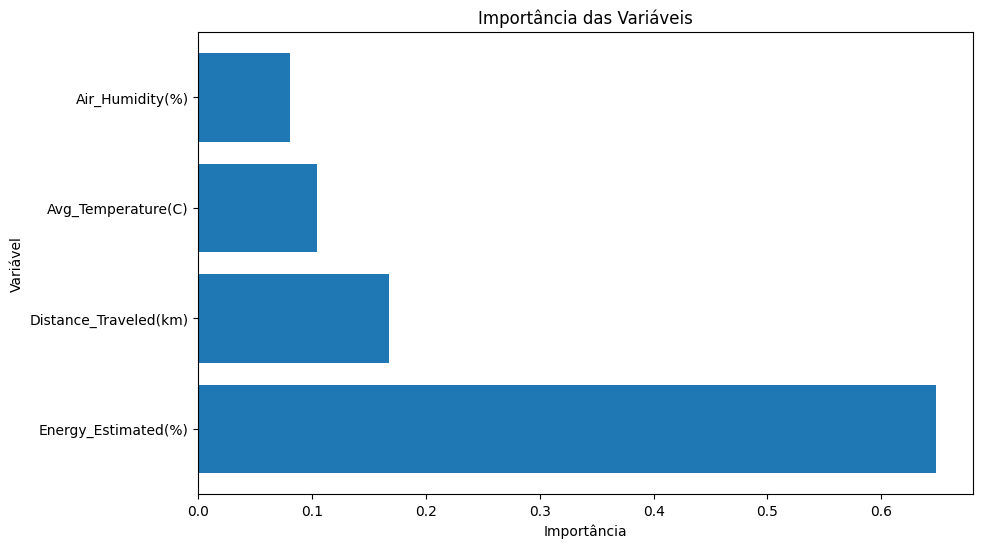

In [10]:
# Obter o modelo com melhor desempenho
best_model = grid_search.best_estimator_

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis')
plt.show()


In [11]:
best_model.feature_importances_

array([0.6486266 , 0.16735047, 0.10380888, 0.08021407], dtype=float32)

In [12]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
best_model.save_model('xgboost_bestmodel.json')

# Fazer previsões com o conjunto de teste
y_pred = best_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 6.17%
MSE: 15.4388
R²: 0.8094


In [13]:
y_pred

array([51.334534, 39.921764, 34.784157, 54.14909 , 59.58538 , 50.70862 ,
       39.67838 , 39.44008 , 37.617603, 44.018394, 62.158688, 45.42715 ,
       43.307262, 53.024506, 36.84894 , 51.893467, 43.632717, 53.69554 ,
       53.92856 , 46.070934, 50.324547, 38.69135 , 45.222412, 46.07866 ,
       48.225777, 41.589092, 39.018147, 44.98302 , 51.788788, 43.23294 ,
       58.538128, 36.692604, 46.698006, 58.325718, 39.09526 , 54.79244 ],
      dtype=float32)

RODAR A PARTIR DAQUI

In [5]:
modelo_carregado = xgb.XGBRegressor()

# Carregue o modelo do arquivo
modelo_carregado.load_model('xgboost_bestmodel.json')

# Faça previsões com novos dados
teste_y_pred = modelo_carregado.predict(X)

In [7]:
mape = mean_absolute_percentage_error(y, teste_y_pred)
mse = mean_squared_error(y, teste_y_pred)
r2 = r2_score(y, teste_y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 6.42%
MSE: 13.9528
R²: 0.8357


In [15]:
teste_y_pred_inf = teste_y_pred * (1 - mape)
teste_y_pred_sup = teste_y_pred * (1 + mape)

interval_confidence = pd.DataFrame({
    'Actual Value (y)': y,               # Valor real
    'Prediction': teste_y_pred,          # Previsão
    'Lower Bound': teste_y_pred_inf,     # Limite inferior do intervalo de confiança
    'Upper Bound': teste_y_pred_sup      # Limite superior do intervalo de confiança
})

# Exibindo o dataframe
print(interval_confidence.head())

   Actual Value (y)  Prediction  Lower Bound  Upper Bound
0              41.2   39.926907    37.365589    42.488220
1              41.6   43.676853    40.874977    46.478729
2              46.4   46.701984    43.706043    49.697922
3              38.0   42.758591    40.015621    45.501560
4              52.4   56.425308    52.805614    60.044998


In [8]:
residuos = [y_t - y_p for y_t, y_p in zip(y, teste_y_pred)]

residuos = np.array(residuos, dtype=np.float64)

residuos = pd.Series(residuos)

C:\Users\duart\AppData\Local\Temp\ipykernel_2568\127783677.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos, fit=norm, kde=True, bins=20, color='darkblue', label='Normal Fit & Histogram')


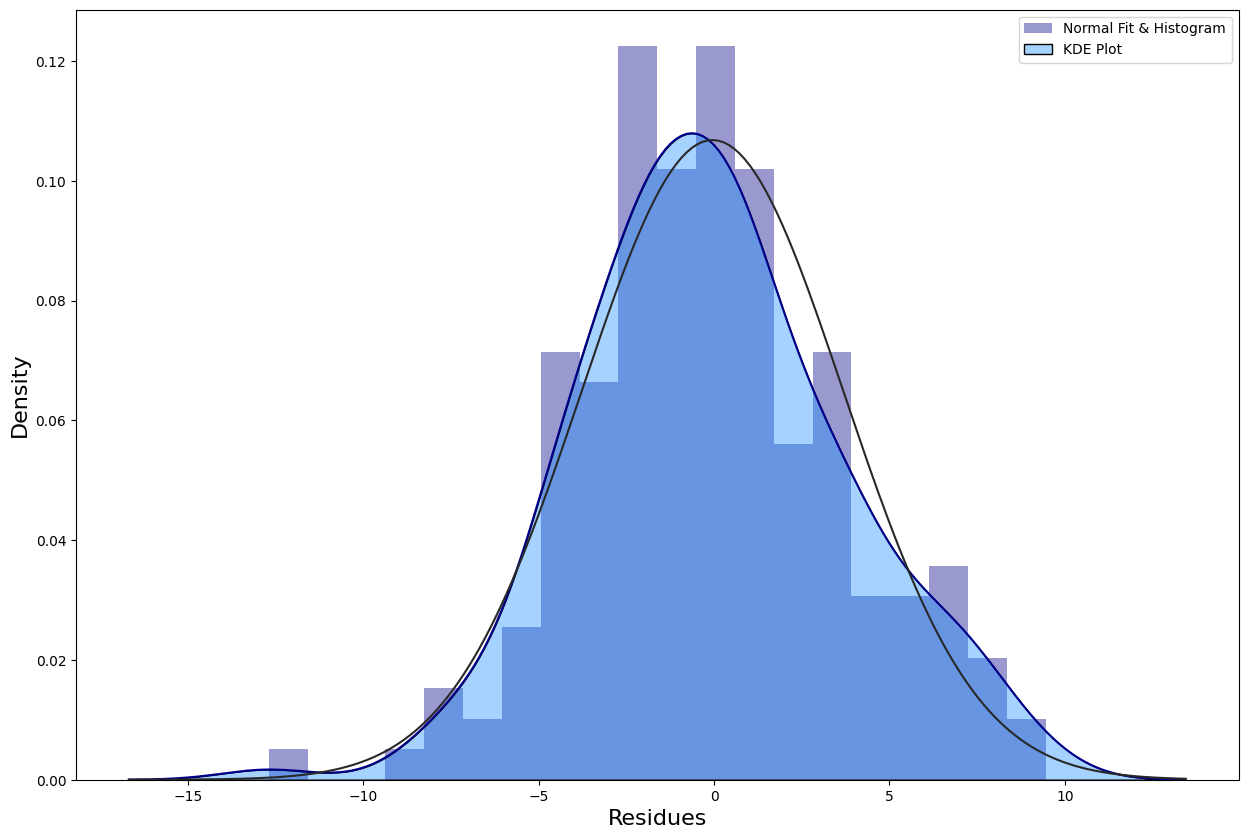

In [23]:
from scipy.stats import norm

plt.figure(figsize=(15, 10))

sns.distplot(residuos, fit=norm, kde=True, bins=20, color='darkblue', label='Normal Fit & Histogram')

sns.kdeplot(data=residuos, multiple="stack", alpha=0.4, color='dodgerblue', label='KDE Plot')

plt.xlabel('Residues', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.legend()

plt.show()

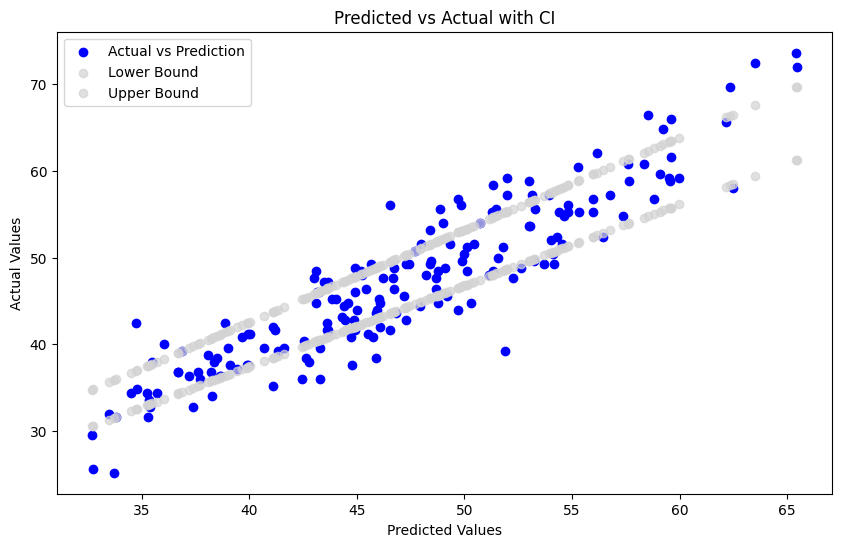

In [35]:
plt.figure(figsize=(10, 6))

# Scatter plot para as previsões vs valores reais
plt.scatter(teste_y_pred, y, label='Actual vs Prediction', color='blue')

# Scatter plot para os limites inferiores
plt.scatter(teste_y_pred, teste_y_pred_inf, color='lightgray', label='Lower Bound', alpha=0.7)

# Scatter plot para os limites superiores
plt.scatter(teste_y_pred, teste_y_pred_sup, color='lightgray', label='Upper Bound', alpha=0.7)

# Rótulos e título do gráfico
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual with CI')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

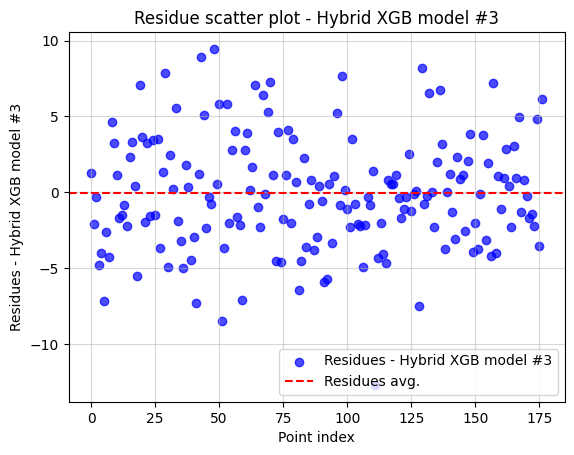

In [9]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid XGB model #3')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid XGB model #3')
plt.title('Residue scatter plot - Hybrid XGB model #3')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.5)

#plt.savefig('scatter_plot_XGB.png', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
mean = np.mean(residuos)
std = np.std(residuos)

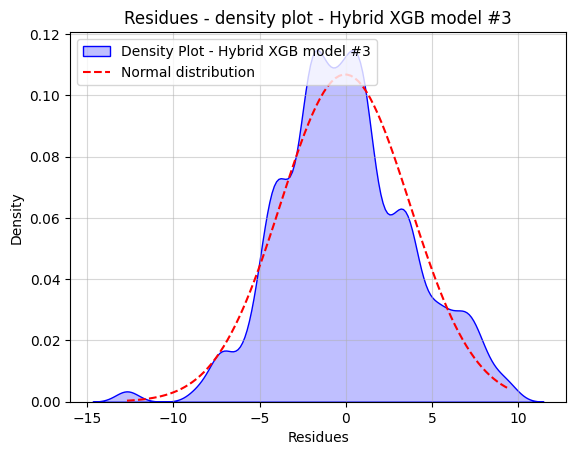

In [12]:
# Plotar a densidade dos resíduos
sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot - Hybrid XGB model #3', bw_adjust=0.5)

# Criar os valores de x para a curva de distribuição normal
x_values = np.linspace(min(residuos), max(residuos), 100)

# Plotar a curva de distribuição normal usando a média e o desvio padrão dos resíduos
plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Normal distribution')

# Configurações do gráfico
plt.title('Residues - density plot - Hybrid XGB model #3')
plt.xlabel('Residues')
plt.ylabel('Density')

# Exibir legenda e grade
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)

# Salvar o gráfico como imagem
#plt.savefig('density_plot_XGB.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [13]:
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9900108418677489
Valor-p: 0.25150101436387406


In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_v2 = sm.add_constant(X_test)

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_test_v2)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 4.309424184267555
Valor-p LM: 0.36574648307577523
Estatística F: 1.053879160235816
Valor-p F: 0.39573302055762133


In [16]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 4

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.93623839946169
DL: 1.382111111111111
DU: 1.6598888888888887
4-DL: 2.617888888888889
4-DU: 2.3401111111111113


In [17]:
n = X_test.shape[0]
k = X_test.shape[1]

In [19]:
y_test_mean = np.mean(y_test)

# Calcular SSR (Sum of Squares Regression)
SSR = np.sum((teste_y_pred - y_test_mean) ** 2)

# Calcular SSE (Sum of Squares Error)
SSE = np.sum((y_test - teste_y_pred) ** 2)

# Calcular SST (Sum of Squares Total)
SST = np.sum((y_test - y_test_mean) ** 2)

# Calcular MSR (Mean Square Regression)
MSR = SSR / k

# Calcular MSE (Mean Square Error)
MSE = SSE / (n - k - 1)

# Calcular a estatística F
F_statistic = MSR / MSE

# Exibir os resultados
print(f'SSR (Sum of Squares Regression): {SSR}')
print(f'SSE (Sum of Squares Error): {SSE}')
print(f'MSR (Mean Square Regression): {MSR}')
print(f'MSE (Mean Square Error): {MSE}')
print(f'Estatística F: {F_statistic}')

SSR (Sum of Squares Regression): 1873.7630615234375
SSE (Sum of Squares Error): 555.7976629915169
MSR (Mean Square Regression): 468.4407653808594
MSE (Mean Square Error): 17.92895687069409
Estatística F: 26.1276084693222


In [20]:
from scipy.stats import f

df1 = k  
df2 = n - k - 1  

# Calcular o p-valor da estatística F
p_value = f.sf(F_statistic, df1, df2)

print(f'Prob (F-statistic): {p_value}')

Prob (F-statistic): 1.5238341068409354e-09


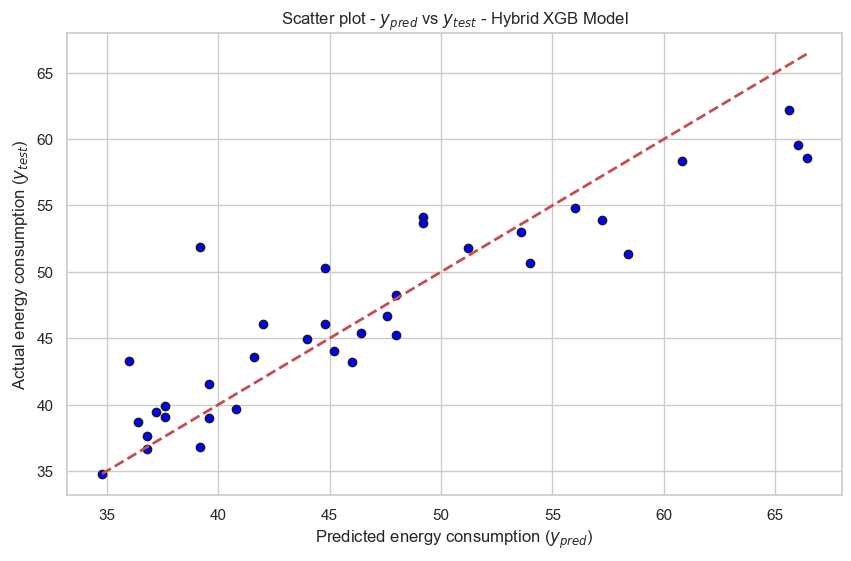

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(y_test, teste_y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Predicted energy consumption ($y_{pred}$)')
plt.ylabel('Actual energy consumption ($y_{test}$)')
plt.title('Scatter plot - $y_{pred}$ vs $y_{test}$ - Hybrid XGB Model')

plt.savefig('pred_XGB.png', dpi=300, bbox_inches='tight')

plt.show()